In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import sympy as sy
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
sy.init_printing()
%matplotlib inline

## Iterative Methods

### 1.) The Jacobi Method


In [2]:
A = np.array([[2, 0, -1],
              [-1, 3, 2],
              [0, 1, 3]])
b = np.array([3, 3, -1])

### Problem 1. 
Write a function that accepts a matrix $A$, a vector $b$, a convergence tolerance $\epsilon$, and a maximum number of iterations $N$. Implement the Jacobi method using Equation 16.3, returning the approximate solution to the equation $Ax = b$.

Run the iteration until $|| x^{(k-1)} - x^{(k)}||_\infty < \epsilon$ and only iterate at most $N$ times. Avoid using `la.inv()` to calculate $D^{-1}$, but use `la.norm()` to calculate the vector $\infty$-norm $||x||_\infty = sup  |x_i|$

￼
    >>> from scipy import linalg as la
    >>> x = np.random.random(10)
    >>> la.norm(x, ord=np.inf)
    0.74623726404168045
    >>> np.max(np.abs(x))
    0.74623726404168045

Your function should be robust enough to accept systems of any size. To test your function, use the following function to generate an $n \times n$ matrix $A$ for which the Jacobi method is guaranteed to converge.

    def diag_dom(n, num_entries=None):
        """Generate a strictly diagonally dominant nxn matrix.
        Inputs:
            n (int): the dimension of the system.
            num_entries (int): the number of nonzero values
                Defaults to n^(3/2)-n.
        Returns:
            A ((n,n) ndarray): An nxn strictly diagonally dominant matrix.
        """
        if num_entries is None:
            num_entries = int(n**1.5) - n
        A = np.zeros((n,n))
        rows = np.random.choice(np.arange(0,n), size=num_entries)
        cols = np.random.choice(np.arange(0,n), size=num_entries)
        data = np.random.randint(-4, 4, size=num_entries)
        for i in xrange(num_entries):
            A[rows[i], cols[i]] = data[i]
        for i in xrange(n):
            A[i,i] = np.sum(np.abs(A[i])) + 1
        return A
        
Generate a random $b$ with `np.random.random()`. Run the iteration, then check that $Ax(k)$ and $b$ are close using `np.allclose()`.

Also test your function on random $n x n$ matrices. If the iteration is non-convergent, the successive approximations will have increasingly large entries.

In [3]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant nxn matrix.
    Inputs:
        n (int): the dimension of the system.
        num_entries (int): the number of nonzero values
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): An nxn strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [4]:
def jacobi_iteration(A, b, eps, N, plot=False):
    x_0 = np.zeros(len(b))
    d = np.diag(A)
    
    #error handling
    if np.any(d==0):
        return "Has zero diagonal"
    
    def plotter(arr):
        plt.title("Convergence of Jacobi Method")
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration #")
        plt.semilogy(arr)
    
    abs_diffs = []
    for i in range(N):
        x_1 = x_0 + (b - np.dot(A, x_0))/d
        diff = la.norm(x_1 - x_0)
        abs_diffs.append(diff)
        if diff<eps:
            if plot:
                plotter(abs_diffs)
            return x_1
        x_0 = x_1
    if plot:
        plotter(abs_diffs)
    return x_1

In [5]:
#check with the example in the lab
x = jacobi_iteration(A, b, 1e-20, 100)
b_ = np.dot(A, x)
b_

array([ 3.,  3., -1.])

In [6]:
b

array([ 3,  3, -1])

In [7]:
#another test
n = 100
A = diag_dom(n)
b = np.random.random(n)

x = jacobi_iteration(A, b, 1e-20, 100)
b_ = np.dot(A,x)
b_

array([ 0.8614604 ,  0.88176508,  0.3983137 ,  0.01455932,  0.6837212 ,
        0.14450148,  0.52033926,  0.56502329,  0.89850347,  0.18926956,
        0.14227474,  0.18640946,  0.69713629,  0.53490094,  0.9270165 ,
        0.09474015,  0.27279238,  0.77903172,  0.39339515,  0.08732566,
        0.33496396,  0.8303489 ,  0.03549838,  0.20093265,  0.05321029,
        0.15724434,  0.33849074,  0.63968233,  0.61471184,  0.39620327,
        0.28062711,  0.87844087,  0.08114646,  0.39121281,  0.72561823,
        0.72240511,  0.63486905,  0.43930445,  0.65549053,  0.11006851,
        0.27256521,  0.97098149,  0.99816927,  0.4081162 ,  0.5857682 ,
        0.2542993 ,  0.21647797,  0.44911066,  0.78725525,  0.56998024,
        0.68546584,  0.21800181,  0.17516349,  0.93707792,  0.87818229,
        0.49205035,  0.07688536,  0.36492871,  0.29201382,  0.54332069,
        0.07695213,  0.32792629,  0.1590146 ,  0.6098419 ,  0.46873001,
        0.04112129,  0.27446394,  0.88142161,  0.31947876,  0.61

In [8]:
b

array([ 0.8614604 ,  0.88176508,  0.3983137 ,  0.01455932,  0.6837212 ,
        0.14450148,  0.52033926,  0.56502329,  0.89850347,  0.18926956,
        0.14227474,  0.18640946,  0.69713629,  0.53490094,  0.9270165 ,
        0.09474015,  0.27279238,  0.77903172,  0.39339515,  0.08732566,
        0.33496396,  0.8303489 ,  0.03549838,  0.20093265,  0.05321029,
        0.15724434,  0.33849074,  0.63968233,  0.61471184,  0.39620327,
        0.28062711,  0.87844087,  0.08114646,  0.39121281,  0.72561823,
        0.72240511,  0.63486905,  0.43930445,  0.65549053,  0.11006851,
        0.27256521,  0.97098149,  0.99816927,  0.4081162 ,  0.5857682 ,
        0.2542993 ,  0.21647797,  0.44911066,  0.78725525,  0.56998024,
        0.68546584,  0.21800181,  0.17516349,  0.93707792,  0.87818229,
        0.49205035,  0.07688536,  0.36492871,  0.29201382,  0.54332069,
        0.07695213,  0.32792629,  0.1590146 ,  0.6098419 ,  0.46873001,
        0.04112129,  0.27446394,  0.88142161,  0.31947876,  0.61

In [9]:
np.allclose(b_, b)

True

### Problem 2.

Modify your Jacobi method function in the following ways:

1. Add a keyword argument called `plot`, defaulting to `False`.
2. Keep track of the absolute error $||Ax^k  - b||_\infty$ of the approximation for each value of $k$.
3. If `plot` is `True`, produce a lin-log plot the error against iteration count (use `plt.semilogy()` instead of `plt.plot()`). Return the approximate solution x even if `plot` is `True`.


array([ 0.35814814,  0.99280224,  0.83352895,  0.65120244,  0.66758843,
        0.65191353,  0.12841149,  0.61299246,  0.08473206,  0.51453535,
        0.21821286,  0.64566635,  0.83822755,  0.88578231,  0.32329971,
        0.58181627,  0.24955414,  0.13475242,  0.42805752,  0.53320951,
        0.71838896,  0.52987207,  0.58878303,  0.59963744,  0.26326393,
        0.59574202,  0.22622667,  0.17874485,  0.6489578 ,  0.34625371,
        0.39654083,  0.67505169,  0.35378626,  0.08286728,  0.10817591,
        0.109385  ,  0.62660307,  0.90177047,  0.51717717,  0.1028377 ,
        0.59712225,  0.41032602,  0.24020945,  0.49077703,  0.05294464,
        0.03147081,  0.47378227,  0.64933052,  0.25404856,  0.84142582,
        0.77125258,  0.63031815,  0.57255052,  0.95623472,  0.54144934,
        0.21336788,  0.07571036,  0.69267706,  0.17433148,  0.08679206,
        0.97179055,  0.87963632,  0.11342304,  0.80019113,  0.16162798,
        0.78360879,  0.06572526,  0.84973674,  0.77941395,  0.92

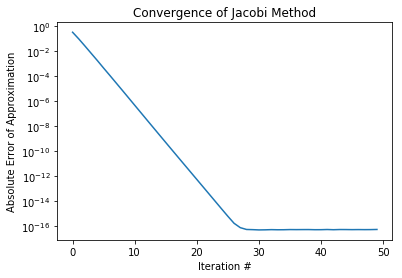

In [10]:
#test
n = 1000
A = diag_dom(n)
b = np.random.random(n)

x = jacobi_iteration(A, b, 1e-20, 50, plot=True)
b_ = np.dot(A,x)
b_

### 2.) The Gauss-Seidel Method

### Problem 3

Write a function that accepts a matrix $A$, a vector $b$, a convergence tolerance $\epsilon$, a amximum number of iterations $N$ and a keyword argument `plot` that defaults to `False`. Implement teh Gauss-Seidel method using Equation 16.5, returning the apprximate solution to the equation $Ax=b$.

Use the same stopping criterion as in Problem 1. Also, keep track of the absolute erros of the iteration, as in Problem 2. If plot is True, plot the error against iteration count. Use `diag_dom()` to generate test cases.


In [11]:
def gaussseidel_method(A, b, eps, N, plot=False):
    x_0 = np.zeros(len(b))
    
    def plotter(arr):
        plt.title("Convergence of Gauss-Seidel Method")
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration #")
        plt.semilogy(arr)

    abs_diffs = []
    for i in range(N):
        x_1 = np.copy(x_0)
        for j in range(len(x_1)):
            x_1[j] = x_0[j] + (b[j] - np.dot(A[j], x_0))/A[j,j]
        
        diff = la.norm(x_1 - x_0)
        abs_diffs.append(diff)
        if diff<eps:
            if plot:
                plotter(abs_diffs)
            return x_1
        x_0 = x_1
    if plot:
        plotter(abs_diffs)
    return x_1

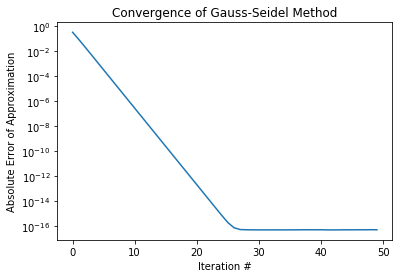

In [12]:
#test
n = 3000
A = diag_dom(n)
b = np.random.random(n)

x_gaussseidel = gaussseidel_method(A, b, 1e-20, 50, plot=True)
b_gaussseidel = np.dot(A, x_gaussseidel)

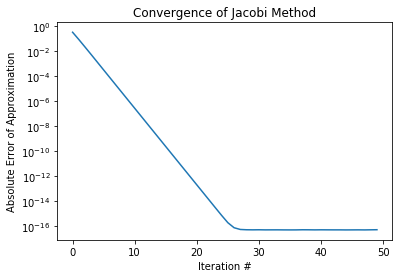

In [13]:
x_jacobi = jacobi_iteration(A, b, 1e-20, 50, plot=True)
b_jacobi = np.dot(A, x_jacobi)

### Problem 4. 
The Gauss-Seidel method is faster than the standard system solver used by `la.solve()` if the system is sufficiently large and sufficiently sparse. For each vale of $n = 5, 6, ..., 11$, generate a random $2^n \times 2^n$ matrix $A$ using `diag_dom()` and a random $2^n$ vector $b$. Time how long it takes to solve $Ax = b$ using your Gauss-Seidel function from Problem 3, and how long it takes to solve using `la.solve()`.

Plot the times against the system size. Use log scales if appropriate.

In [14]:
ns = np.arange(5, 12)
gaussseidel = []
lasolver = []
for n in ns:
    A = diag_dom(2**n)
    b = np.random.random(2**n)
    
    start = time.time()
    x_gauss = gaussseidel_method(A, b, 1e-10, 1000)
    end = time.time()
    
    gaussseidel.append(end-start)
    
    start = time.time()
    x_lasolver = la.solve(A, b)
    end = time.time()
    
    lasolver.append(end - start)

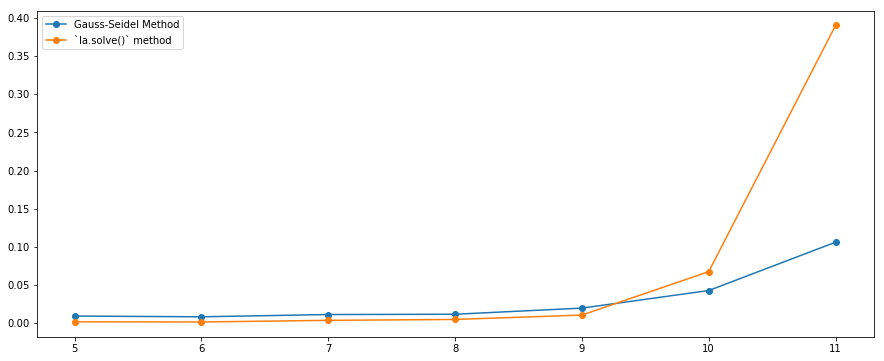

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(ns, gaussseidel, 'o-', label="Gauss-Seidel Method")
plt.plot(ns, lasolver, 'o-', label="`la.solve()` method")
plt.legend(loc=0)

### Problem 5. 
Write a new function that accepts a $sparse$ matrix $A$, a vector $b$, a convergence tolerance $\epsilon$, and a maximum number of iterations $N$ (plotting the convergence is not required for this problem). Implement the Gauss-Seidel method using Equation 16.5, returning the approximate solution to the equation $Ax = b$. Use the usual stopping criterion.
The Gauss-Seidel method requires extracting the rows $A_i$ from the matrix $A$ and computing $A^T_x$. There are many ways to do this that cause some fairly serious runtime issues, so we provide the code for this specific portion of the algorithm.

    ￼￼# Slice the i-th row of A and dot product the vector x.
    rowstart = A.indptr[i]
    rowend = A.indptr[i+1]
    Aix = np.dot(A.data[rowstart:rowend], x[A.indices[rowstart:rowend]])
    
To test your function, cast the result of `diag_dom()` as a sparse matrix.


    ￼￼from scipy import sparse
    >>> A = sparse.csr_matrix(diag_dom(50000))
    >>> b = np.random.random(50000)

In [16]:
A = sp.sparse.csr_matrix(diag_dom(50000))
b = np.random.random(50000)

In [21]:
N = 10
eps = 1e-8

In [22]:
x_0 = np.zeros(len(b))

for i in range(N):
    x_1 = np.copy(x_0)
    for j in range(len(x_1)):
        rowstart = A.indptr[j]
        rowend = A.indptr[j+1]
        x_1[j] = x_0[j] + (b[j] - np.dot(A.data[rowstart:rowend], x_0[A.indices[rowstart:rowend]]))/A[j,j]
        diff = la.norm(x_1 - x_0)
        if diff<eps:
            sol = x_1
        x_0 = x_1
    sol_ = x_1